### Chapter 11 - Bayesian Inference Exercise 2
Let $X_1,..,X_n \sim N(\mu, 1)$.

#### (a) Simulate a data set (using $\mu = 5$) consisting of $n=100$ observations.

In [1]:
mu <- 5
n <- 100

In [2]:
x <- rnorm(n, mean = mu, sd = 1)

#### (b) Take $f(\mu)=1$ and find the posterior density. Plot the density.

We can analytically find the closed-form posterior density of $\mu|X_1,...X_n, g(\mu|x_1,...,x_n)$

$$g(\mu|x_1,...,x_n) \propto f(\mu) \prod_{i=1}^{n} f(x_i|\mu) \propto e^{-\frac{(\mu-\bar x)^2}{2/n}}$$

Hence, we can infer that

$$ \mu|X_1,...,X_n \sim N(\bar X, 1/n)$$

In [13]:
post.mean <- mean(x)
post.var <- 1/n
pdf <- dnorm(seq(4,6,0.01), mean = post.mean, sd = sqrt(post.var))

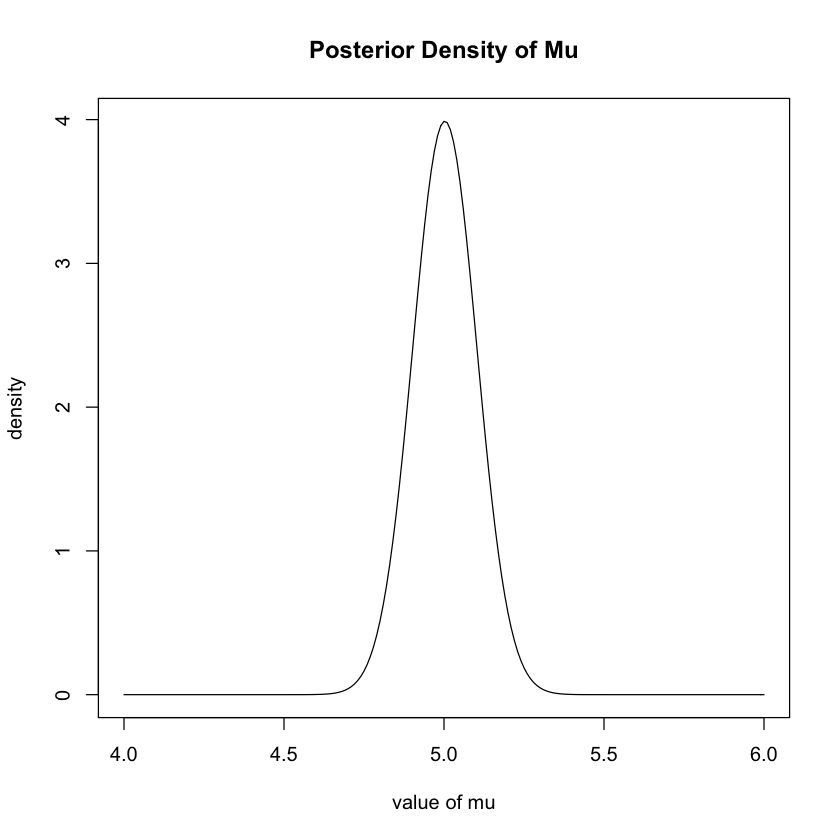

In [16]:
plot(x = seq(4, 6, 0.01), y = pdf, 
     main = "Posterior Density of Mu", type = "l",
     xlab = "value of mu", ylab = "density")

#### (c) Simulate 1000 draws from the posterior. Plot a histogram of the simulated values and compare the histogram to the answer in (b).

In [23]:
sample.mu <- rnorm(1000, mean = post.mean, sd = sqrt(post.var))

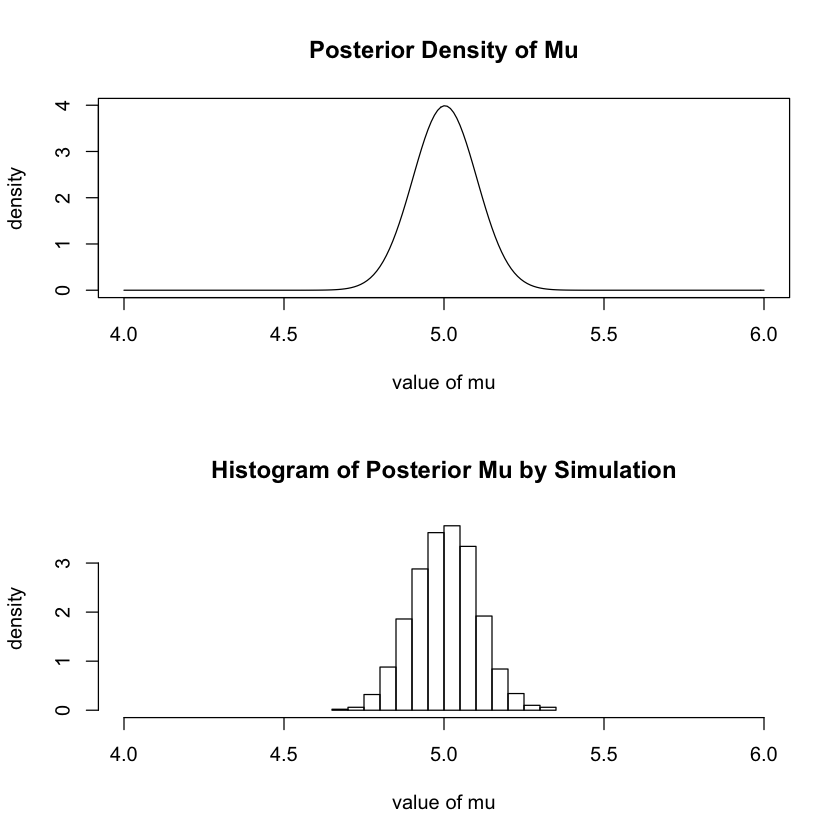

In [24]:
par(mfrow=c(2,1))
plot(x = seq(4, 6, 0.01), y = pdf, 
     main = "Posterior Density of Mu", type = "l",
     xlab = "value of mu", ylab = "density")
hist(sample.mu, xlim = c(4,6), breaks = 20,
      main = "Histogram of Posterior Mu by Simulation",
      xlab = "value of mu", ylab = "density",
      freq = FALSE)

#### (d) Let $\theta = e^{\mu}$. Find the posterior density for $\theta$ analytically and by simulation.

The posterior density for $\theta$ can be found analytically as follows:

$$\Pr(\theta \le z | X_1,...,X_n) = \Pr(\mu \le ln(z) | X_1,...,X_n) = \Pr(Z \le (ln(z) - \bar X) \sqrt{n}) = \Phi((ln(z) - \bar X) \sqrt{n})$$

With the cumulative distribution above, we can derive the probability density function as follows:

$$g(\theta|x_1,...,x_n) = \Phi ' ((ln(z) - \bar X) \sqrt{n}) = 
\phi((ln(z) - \bar X) \sqrt{n}) \frac{\sqrt{n}}{z} = 
\frac{\sqrt{n}}{\sqrt{2\pi}z} e^{-\frac{(ln(z)-\bar X)^2}{2/n}}$$

It is clearly shown that the posterior density for $\theta$ follows log-normal distribution.

Besides analytical method, the simplest way to find the posterior density for $\theta$ is by simulation. The procedures are described as follows:
1. Sample $\mu_1,...,\mu_n \sim N(\bar X, 1/n)$ (Which we have done in part c.)
2. Calculate $\theta_1,...,\theta_n$ by $\theta_i = e^{\mu_i}$
3. Plot a histogram for $\{\theta_i \}_{i=1}^{n}$

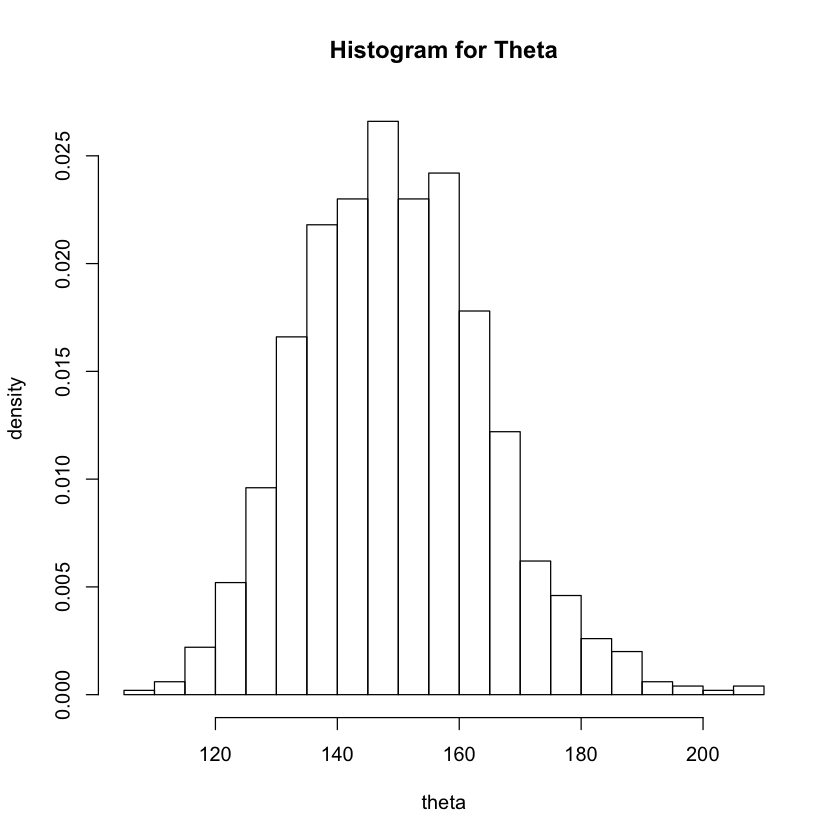

In [27]:
sample.theta <- exp(sample.mu)
hist(sample.theta, breaks = 30, main = "Histogram for Theta",
      xlab = "theta", ylab = "density", freq = FALSE)

From the histogram, it can be shown that the histogram resembles a log-normal distribution. It echoes with the answer from analytical approach.

#### (e) Find a 95 percent posterior interval for $\mu$.

As the posterior density of $\mu$ is Normal, we can easily construct a confidence interval by normal-based interval.

$$ \bar X \pm z_{0.975} \frac{1}{\sqrt{n}}$$

In [28]:
mu.low <- post.mean - qnorm(0.975) * sqrt(post.var)
mu.high <- post.mean + qnorm(0.975) * sqrt(post.var)

In [30]:
print(paste0("The 95% Posterior Interval for mu = (", 
        round(mu.low, 3), ", ", round(mu.high, 3), ")"))

[1] "The 95% Posterior Interval for mu = (4.807, 5.199)"


#### (f) Find a 95 percent posterior interval for $\theta$.

As for posterior density of $\theta$, it is positively skewed so it doesn't resemble normal distribution (Though we know that it will be asymptotically normal).

In this case, we construct an equal tail confidence interval for posterior $\theta$.


In [31]:
theta.low <- quantile(sample.theta, probs = 0.025)
theta.high <- quantile(sample.theta, probs = 0.975)

In [32]:
print(paste0("The 95% Posterior Interval for theta = (", 
        round(theta.low, 3), ", ", round(theta.high, 3), ")"))

[1] "The 95% Posterior Interval for theta = (122.649, 181.284)"
